In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df_m1 = pd.read_csv('../data/raw_extraction/vancouver_real_estate_m1.csv', index_col = 0)
df_m1_2 = pd.read_csv('../data/raw_extraction/vancouver_real_estate2_m1.csv', index_col = 0)


In [3]:
df_m1 = pd.concat([df_m1, df_m1_2], axis=0)
df_m1.drop_duplicates(inplace=True)

In [14]:
# Convert empty strings and None to NaN
df_m1.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Convert price to float
df_m1["price"] = df_m1["price"].replace(r"[\$,]", "", regex=True).astype("float32")

# Convert bed to integer (using Int64 which supports NaN)
df_m1["bed"] = df_m1["bed"].astype(str).str.extract(r"(\d+)").astype("Int32")

# Convert bath to float (supports half baths)
df_m1["bath"] = df_m1["bath"].astype(str).str.extract(r"(\d+\.?\d*)").astype("float32")

# Convert sqr_footage to float, handling missing values properly
df_m1["sqr_footage"] = (
    df_m1["sqr_footage"]
    .astype(str)
    .str.replace(",", "", regex=True)
    .str.extract(r"(\d+)")
    .astype("float32")
)



In [15]:
df_m1.head()

,address,zip_code,price,bed,bath,sqr_footage,property_link
0,4091 W 34th Ave,V6N 2L6,2788000.0,5,2.0,1653.0,https://www.redfin.com/bc/vancouver/4091-W-34t...
1,4067 W 37th Ave,V6N 2W6,4800000.0,6,4.0,4189.0,https://www.redfin.com/bc/vancouver/4067-W-37t...
2,4056 W 36th Ave,V6N 2S9,6750000.0,4,3.0,3837.0,https://www.redfin.com/bc/vancouver/4056-W-36t...
3,3968 W 23rd Ave,V6S 1L2,3388000.0,4,3.5,2359.0,https://www.redfin.com/bc/vancouver/3968-W-23r...
4,4022 W 30th Ave,V6S 1X5,6590000.0,5,5.5,4190.0,https://www.redfin.com/bc/vancouver/4022-W-30t...


In [16]:
df_m2 = pd.read_csv("../data/raw_extraction/vancouver_real_estate_m2", index_col = 0)
df_event_m2 = pd.read_csv("../data/raw_extraction/vancouver_real_estate_event_m2", index_col = 0)
df_event_list_m2 = pd.read_csv("../data/raw_extraction/vancouver_real_estate_event2_m2", index_col = 0)

In [17]:
print(f'df_m2: {df_m2.shape}')
print(f'df_event_m2: {df_event_m2.shape}')
print(f'df_event_list_m2: {df_event_list_m2.shape}')

df_m2: (14907, 8)
df_event_m2: (4786, 6)
df_event_list_m2: (1724, 5)


In [18]:
print(f'columns of df_m2: {df_m2.columns}')
print(f'columns of df_event_m2: {df_event_m2.columns}')
print(f'columns df_event_list_m2: {df_event_list_m2.columns}')

columns of df_m2: Index(['address', 'postalCode', 'latitude', 'longitude', 'price',
       'square_footage', 'bedroom', 'url'],
      dtype='object')
columns of df_event_m2: Index(['address', 'postalCode', 'latitude', 'longitude', 'price', 'url'], dtype='object')
columns df_event_list_m2: Index(['address', 'postalCode', 'latitude', 'longitude', 'url'], dtype='object')


In [19]:
pd.concat([df_m2, df_event_m2, df_event_list_m2], axis=0).drop_duplicates()

,address,postalCode,latitude,longitude,price,square_footage,bedroom,url
0,4615 W 4th Ave,V6R 1R6,49.269275,49.269275,2888000.0,2300.0,5.0,https://www.redfin.ca/bc/vancouver/4615-W-4th-...
1,4922 Queensland Rd,V6T 1G4,49.266380,49.266380,3550000.0,2392.0,5.0,https://www.redfin.ca/bc/greater-vancouver-reg...
2,4650 W 6th Ave,V6R 1V7,49.267092,49.267092,4088800.0,2548.0,5.0,https://www.redfin.ca/bc/vancouver/4650-W-6th-...
3,4343 W 14 Ave,V6R 2X9,49.260349,49.260349,2699000.0,2202.0,3.0,https://www.redfin.ca/bc/vancouver/4343-W-14th...
4,4688 W 10th Ave #402,V6R 2J5,49.263644,49.263644,1198000.0,1165.0,2.0,https://www.redfin.ca/bc/vancouver/4688-W-10th...
...,...,...,...,...,...,...,...,...
297,189 Keefer St #1006,V6A 0C8,49.279651,-123.100137,NaN,NaN,NaN,https://www.redfin.ca/bc/vancouver/189-Keefer-...
298,120 Powell St #31,V6A 1G1,49.283004,-123.101533,NaN,NaN,NaN,https://www.redfin.ca/bc/vancouver/120-Powell-...
299,518 Beatty St #804,V6B 6G8,49.280869,-123.108795,NaN,NaN,NaN,https://www.redfin.ca/bc/vancouver/518-Beatty-...
300,188 Keefer Pl #226,V6B 0J1,49.279640,-123.108857,NaN,NaN,NaN,https://www.redfin.ca/bc/vancouver/188-Keefer-...


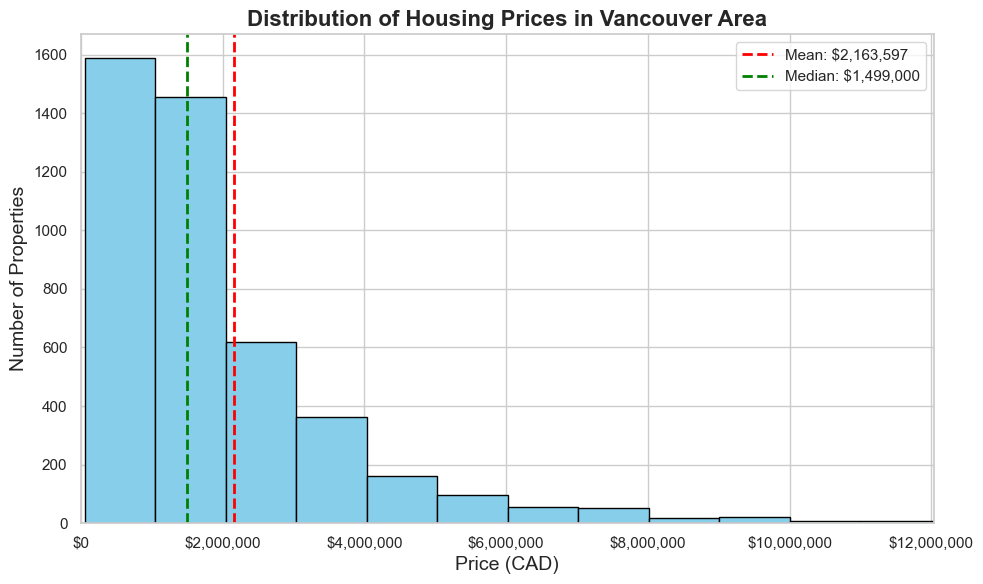

In [20]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
price_data = df["price"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Prices in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Price (CAD)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x):,}'))

# Add vertical lines for key statistics
mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, price_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


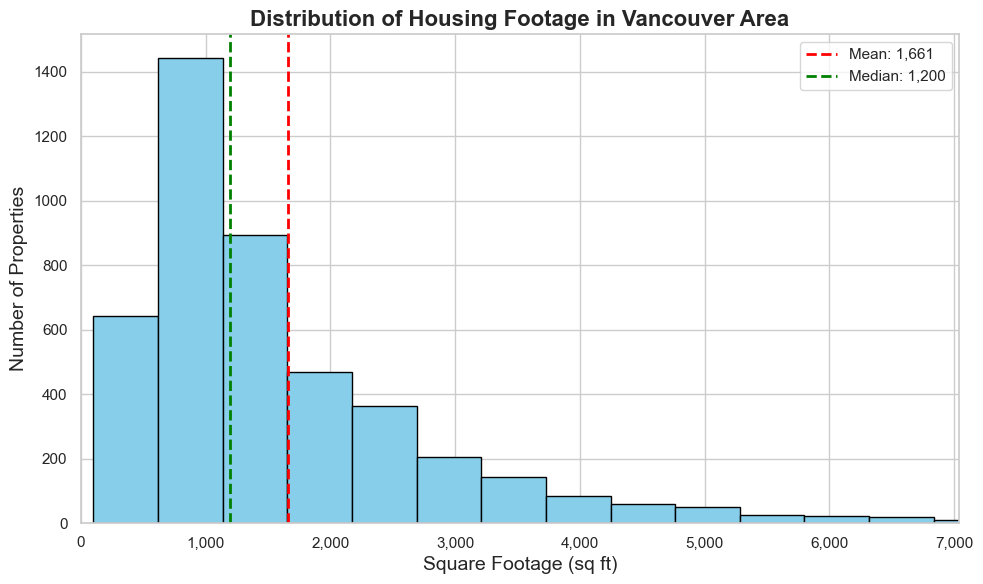

In [21]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
footage_data = df["sqr_footage"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(footage_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Footage in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Square Footage (sq ft)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Add vertical lines for key statistics
mean_footage = footage_data.mean()
median_footage = footage_data.median()

plt.axvline(mean_footage, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_footage:,.0f}')
plt.axvline(median_footage, color='green', linestyle='--', linewidth=2, label=f'Median: {median_footage:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, footage_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


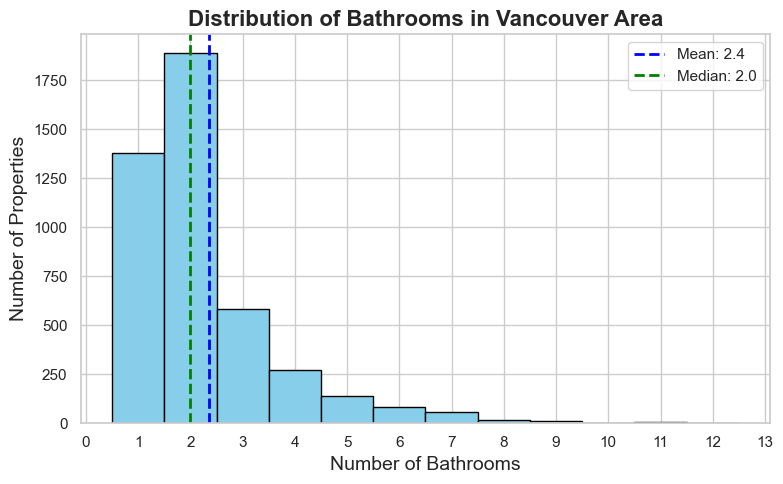

In [22]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bath_data = df["bath"].dropna()
plt.hist(bath_data, bins=range(1, int(bath_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Bathrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bath = bath_data.mean()
median_bath = bath_data.median()
plt.axvline(mean_bath, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bath:.1f}')
plt.axvline(median_bath, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bath:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


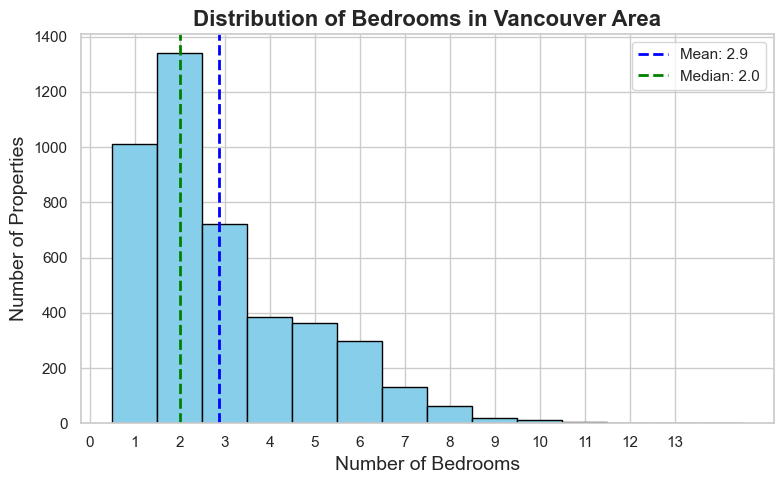

In [23]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bed_data = df["bed"].dropna()
plt.hist(bed_data, bins=range(1, int(bed_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Bedrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bed = bed_data.mean()
median_bed = bed_data.median()
plt.axvline(mean_bed, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bed:.1f}')
plt.axvline(median_bed, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bed:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Further examination of price distribution by zip code

zip_summary = df.groupby("zip_code").agg(
    num_properties=("price", "count"),
    mean_price=("price", "mean"),
    median_price=("price", "median"),
    mean_sqft=("sqr_footage", "mean"),
    median_sqft=("sqr_footage", "median")
).reset_index()

# Optionally: format large numbers for readability
zip_summary["mean_price"] = zip_summary["mean_price"].round(0)
zip_summary["median_price"] = zip_summary["median_price"].round(0)
zip_summary["mean_sqft"] = zip_summary["mean_sqft"].round(0)
zip_summary["median_sqft"] = zip_summary["median_sqft"].round(0)

# Display the summary
zip_summary


,zip_code,num_properties,mean_price,median_price,mean_sqft,median_sqft
0,V0V 0V0,37,1368738.0,1289000.0,998.0,916.0
1,V3B 2P5,1,6360000.0,6360000.0,4465.0,4465.0
2,V3E 4N1,1,928000.0,928000.0,590.0,590.0
3,V5G 3K3,1,2388000.0,2388000.0,4381.0,4381.0
4,V5H 1C3,1,2170000.0,2170000.0,2837.0,2837.0
...,...,...,...,...,...,...
2364,V8K 1J6,1,1275000.0,1275000.0,4045.0,4045.0
2365,V8K 1P2,1,769000.0,769000.0,1245.0,1245.0
2366,V9C 0A2,1,6380000.0,6380000.0,3788.0,3788.0
2367,Z5Z 0K7,1,1149900.0,1149900.0,595.0,595.0


In [25]:
df['zip_code'].str[:3].value_counts()

zip_code
V6B    453
V6Z    347
V6P    324
V5R    291
V5Z    223
V6E    201
V5X    199
V5N    188
V6G    184
V5Y    159
V5T    155
V5S    150
V6A    141
V6J    138
V6R    135
V6M    135
V6K    106
V5K     98
V6N     98
V5M     95
V5P     88
V5V     87
V6H     79
V5W     74
V5L     71
V6L     71
V6C     70
V6S     60
V0V     37
V6T     10
V7M      7
V7E      2
V8K      2
V7V      2
V6X      1
and      1
Z5Z      1
V5G      1
V5H      1
V7P      1
V6Y      1
V3E      1
V7W      1
V3B      1
V7X      1
V9C      1
Name: count, dtype: int64